In [2]:
# import the required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import scipy

Matplotlib is building the font cache; this may take a moment.


# Preprocess

In [3]:
# load the dataset using pandas
data = pd.read_csv('s3://sagemaker-studio-408970228172-8k2laox6686/data-ingestion/creditcard.csv')

In [19]:
data

Time        V1        V2        V3        V4        V5        V6  \
169876  119907.0 -0.611712 -0.769705 -0.149759 -0.224877  2.028577 -2.019887   
127467   78340.0 -0.814682  1.319219  1.329415  0.027273 -0.284871 -0.653985   
137900   82382.0 -0.318193  1.118618  0.969864 -0.127052  0.569563 -0.532484   
21513    31717.0 -1.328271  1.018378  1.775426 -1.574193 -0.117696 -0.457733   
134700   80923.0  1.276712  0.617120 -0.578014  0.879173  0.061706 -1.472002   
...          ...       ...       ...       ...       ...       ...       ...   
2032      1574.0 -0.615776  0.654356  2.618793  0.857434 -0.487340  0.593957   
240932  150813.0 -3.517229  3.326821 -3.590262  0.674769 -0.679266 -0.469516   
3701      3169.0 -0.315540  1.054303  1.484711  1.138262  0.394713 -0.168883   
153365   98752.0 -3.580417  4.100916 -2.577720 -1.476718 -0.006201 -2.008418   
97365    66187.0  1.213349  0.227172 -0.886860  1.345683  2.254592  3.788565   

              V7        V8        V9  ...       V21       V22       V23  \
169876  0.292491 -0.523020  0.358468  ... -0.075208  0.045536  0.380739   
127467  0.321552  0.435975 -0.704298  ... -0.128619 -0.368565  0.090660   
137900  0.706252 -0.064966 -0.463271  ... -0.305402 -0.774704 -0.123884   
21513   0.681867 -0.031641  0.383872  ... -0.220815 -0.419013 -0.239197   
134700  0.373692 -0.287204 -0.084482  ... -0.160161 -0.430404 -0.076738   
...          ...       ...       ...  ...       ...       ...       ...   
2032   -0.095191  0.426786  0.011607  ...  0.010440  0.113631 -0.313035   
240932 -1.135362  2.778095 -2.404956  ...  0.455767  0.388102  0.268986   
3701    0.737923 -0.061284 -0.952381  ...  0.005626  0.094740  0.024370   
153365  0.887262  0.304192  2.879710  ... -0.194866  0.571678 -0.001519   
97365  -0.521816  0.891366 -0.776104  ...  0.102366  0.116553 -0.166854   

             V24       V25       V26       V27       V28  Amount  Class  
169876  0.023440 -2.220686 -0.201146  0.066501  0.221180    1.79      0  
127467  0.401147 -0.261034  0.080621  0.162427  0.059456    1.98      0  
137900 -0.495687 -0.018148  0.121679  0.249050  0.092516    0.89      0  
21513   0.009967  0.232829  0.814177  0.098797 -0.004273   15.98      0  
134700  0.258708  0.552170  0.370701 -0.034255  0.041709    0.76      0  
...          ...       ...       ...       ...       ...     ...    ...  
2032   -0.015388  0.213878 -0.268579  0.117815  0.075734    9.99      0  
240932  0.382692 -0.653335  2.192962 -0.953907 -0.137082    0.76      0  
3701    0.091800 -0.463470 -0.457328  0.194541  0.166039   19.60      0  
153365  0.009117  0.321669  0.034900  0.785417  0.353092    0.92      0  
97365   1.015984  0.755462  0.169925 -0.005633  0.017400   19.34      0  

[28481 rows x 31 columns]

In [5]:
# dataset exploring
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [6]:
# Print the shape of the data
data = data.sample(frac=0.1, random_state = 1)
print(data.shape)
print(data.describe())

(28481, 31)
                Time            V1            V2            V3            V4  \
count   28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean    94705.035216     -0.001143     -0.018290      0.000795      0.000350   
std     47584.727034      1.994661      1.709050      1.522313      1.420003   
min         0.000000    -40.470142    -63.344698    -31.813586     -5.266509   
25%     53924.000000     -0.908809     -0.610322     -0.892884     -0.847370   
50%     84551.000000      0.031139      0.051775      0.178943     -0.017692   
75%    139392.000000      1.320048      0.792685      1.035197      0.737312   
max    172784.000000      2.411499     17.418649      4.069865     16.715537   

                 V5            V6            V7            V8            V9  \
count  28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean      -0.015666      0.003634     -0.008523     -0.003040      0.014536   
std        1.395552      1.334

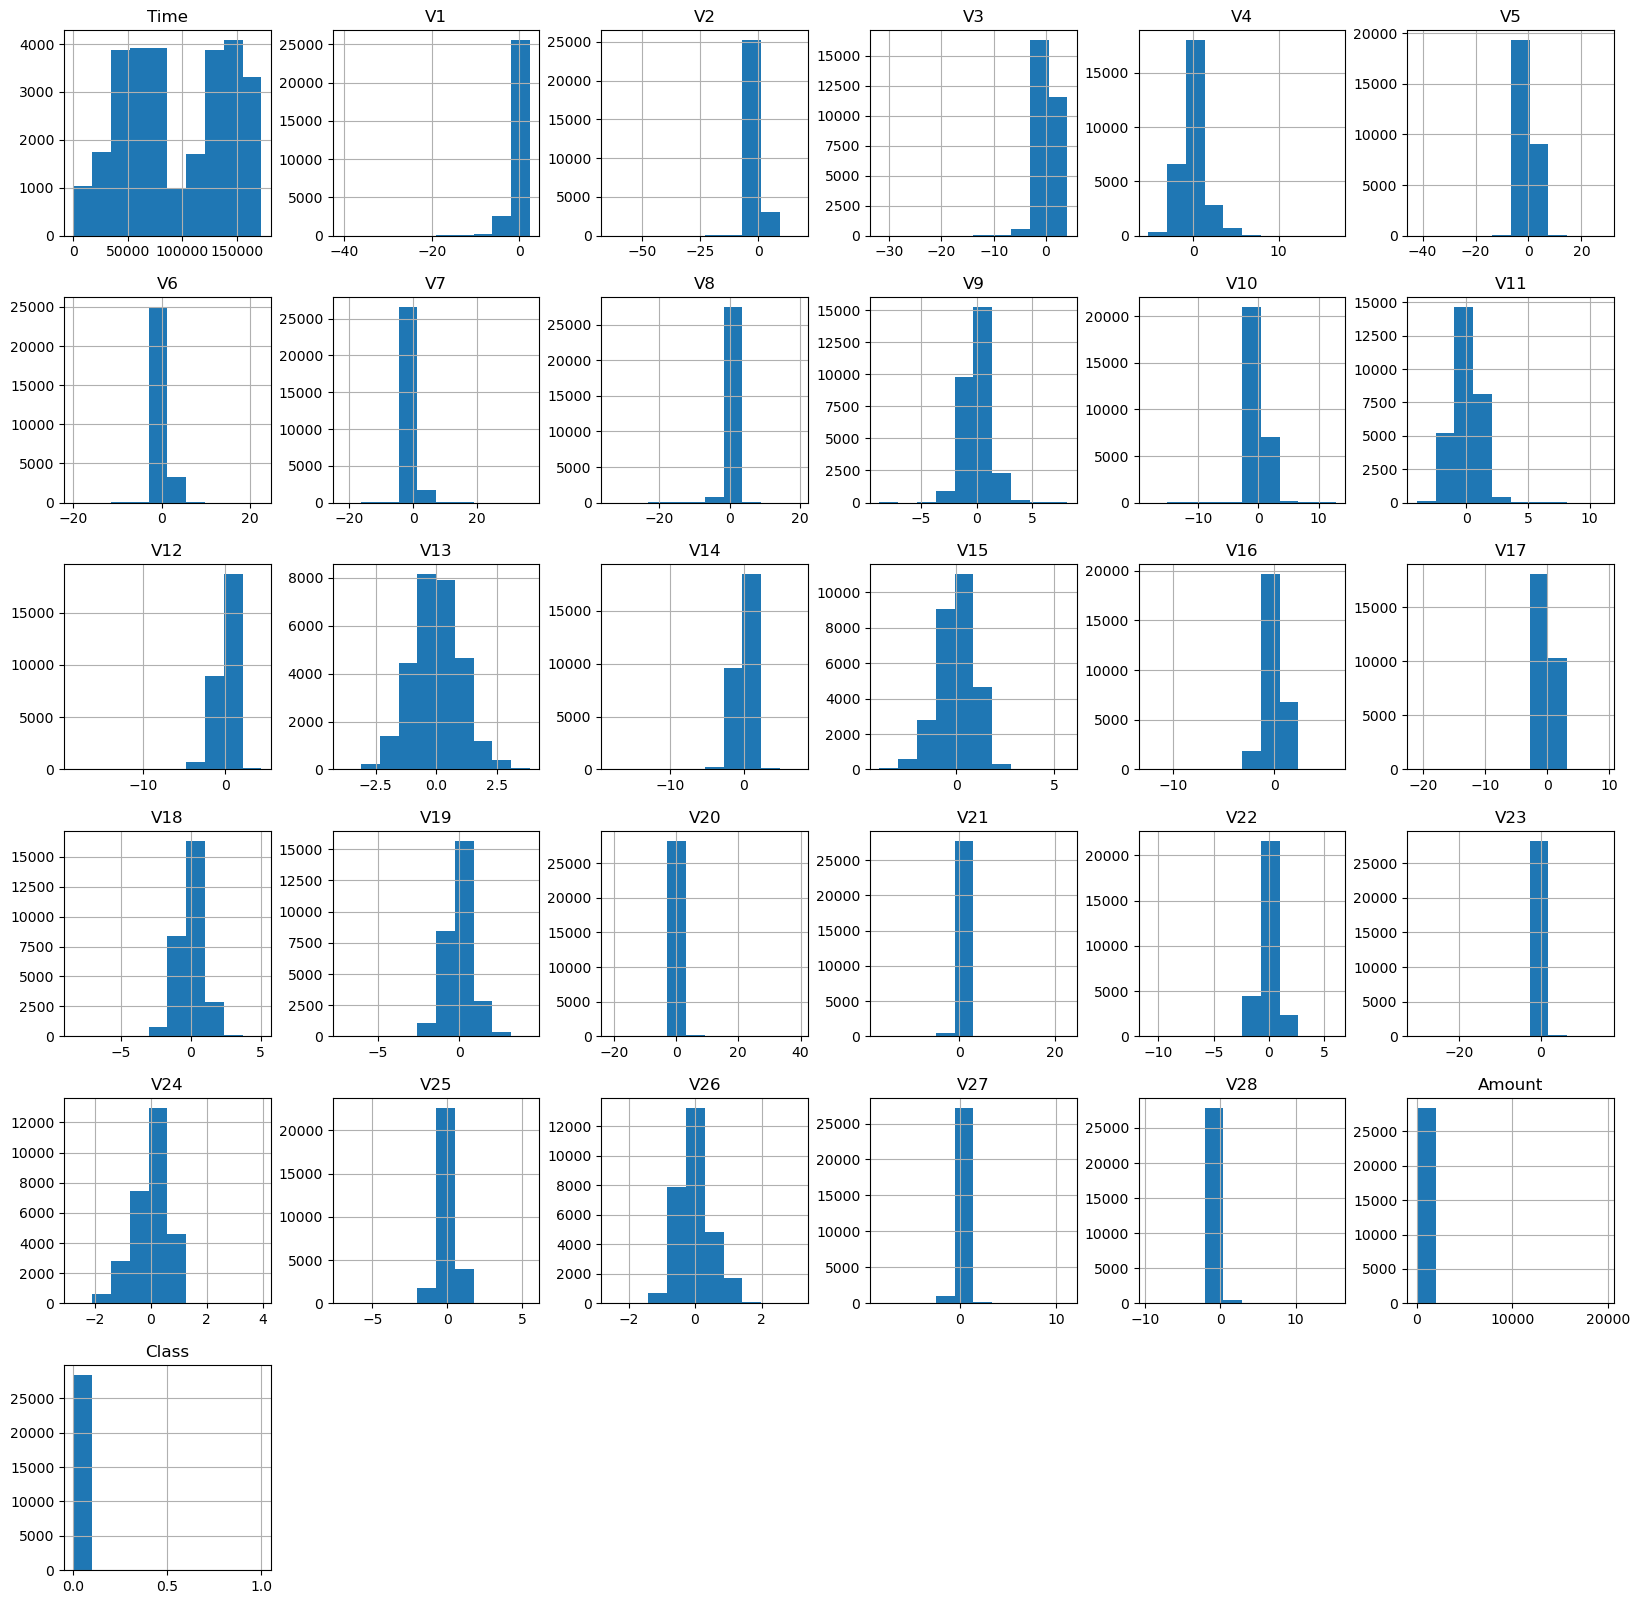

In [7]:
# Plot histograms of each parameter 
data.hist(figsize = (20, 20))
plt.show()

In [8]:
# Determine number of fraud cases in dataset

Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017234102419808666
Fraud Cases: 49
Valid Transactions: 28432


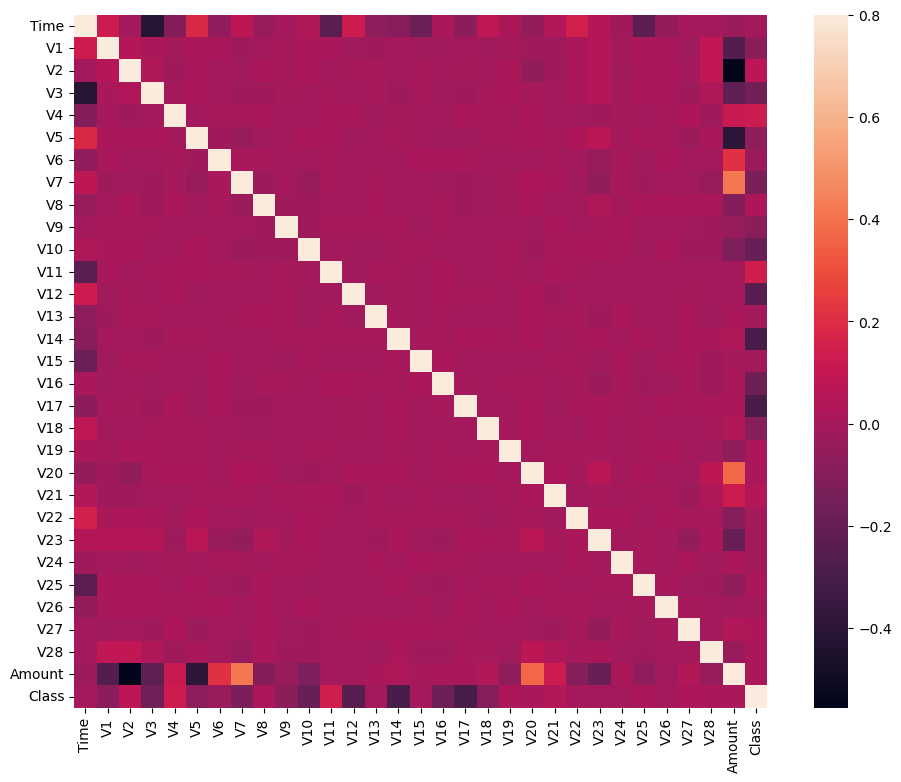

In [9]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [10]:
# Get all the columns from the dataFrame
columns = data.columns.tolist()

# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]

# Store the variable we'll be predicting on
target = "Class"

X = data[columns]
Y = data[target]

# Print shapes
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [11]:

from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor


In [12]:
# define random states
state = 1

# define outlier detection tools to be compared
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)}
    
plt.figure(figsize=(9, 7))
n_outliers = len(Fraud)

<Figure size 900x700 with 0 Axes>

In [13]:

for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()

    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 71
0.99750711000316
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.28      0.29      0.28        49

    accuracy                           1.00     28481
   macro avg       0.64      0.64      0.64     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 97
0.9965942207085425
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481



/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/neighbors/_lof.py:510: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0 / (np.mean(reach_dist_array, axis=1) + 1e-10)


In [14]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
len(y_pred)

28481

In [18]:
pd.DataFrame(y_pred).value_counts()

0    28431
1       50
dtype: int64